# Desafio TERA - Classificação de fraude em transações bancárias

Desafio proposto na aula de modelos de classificação do curso de Ciência de dados e Machine Learning da escola TERA.
Nele analisaremos os dados sintéticos de transações bancárias de uma instituição fictícia.<br>
O objetivo do desafio é aplicar um modelo de classificação capaz de detectar fraudes.
Para isso seguiremos os seguintes passos:<br>
- 1.Carregando bibliotecas
- 2.Carregando dataset e informações básicas
- 3.Análise descritiva
- 4.Pré-processamento
- 5.Modelagem
- 6.Sumarizando resultados
- 7.Tunning hiperparametros
- 8.Análise dos resultados e conclusão
- 9.Referências

# 1.Carregando bibliotecas

In [1]:
import time

# Análise e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree as treeclass

# Pré-processamento de dados
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métricas de avaliação de modelos
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier import classification_report 

# Modelos de classificação
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV

# Seleção de variáveis e modelos
import shap
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel

# Usar estilo de gráfico da biblioteca ggplot
plt.style.use('ggplot')

# Formatar saidas de tabelas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

d:\ciencia_de_dados\projetos\classificacao_desafio_tera\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2.Carregando dataset e informações básicas

In [2]:
df = pd.read_csv('data/desafio_classificacao.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
# Amostra aleatória
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5605190,394,CASH_OUT,439626.72,C1985144540,132116.00,0.00,C2064798656,141761.40,581388.12,0,0
3338227,253,CASH_OUT,162133.27,C1155951445,0.00,0.00,C1480523944,342840.27,504973.54,0,0
5001908,353,TRANSFER,1703.46,C2105262187,0.00,0.00,C943459907,8838611.06,8840314.51,0,0
4945371,351,CASH_OUT,134542.27,C1178945760,0.00,0.00,C109023801,3056920.96,3191463.23,0,0
6039462,482,CASH_OUT,132438.82,C561223504,132438.82,0.00,C212208463,0.00,132438.82,1,0
2078713,182,CASH_OUT,218217.00,C646467792,0.00,0.00,C835326048,1451697.81,1669914.80,0,0
4729441,332,CASH_IN,95693.27,C1116149117,10960181.60,11055874.87,C855292481,2169924.89,2074231.62,0,0
4881354,348,TRANSFER,500947.30,C1574556135,10180.00,0.00,C1372353180,6212422.19,6713369.49,0,0
4782957,336,PAYMENT,2267.43,C714360920,85459.00,83191.57,M2003844391,0.00,0.00,0,0
3223591,250,CASH_IN,346064.86,C348993611,11011.00,357075.86,C1473232790,151558.57,0.00,0,0


# 3.Análise descritiva

In [4]:
# Descritiva de variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.00,243.40,142.33,1.00,156.00,239.00,335.00,743.00
amount,6362620.00,179861.90,603858.23,0.00,13389.57,74871.94,208721.48,92445516.64
oldbalanceOrg,6362620.00,833883.10,2888242.67,0.00,0.00,14208.00,107315.18,59585040.37
newbalanceOrig,6362620.00,855113.67,2924048.50,0.00,0.00,0.00,144258.41,49585040.37
oldbalanceDest,6362620.00,1100701.67,3399180.11,0.00,0.00,132705.66,943036.71,356015889.35
newbalanceDest,6362620.00,1224996.40,3674128.94,0.00,0.00,214661.44,1111909.25,356179278.92
isFraud,6362620.00,0.00,0.04,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,6362620.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [5]:
# Descritiva de variáveis categóricas
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


<Axes: xlabel='type', ylabel='count'>

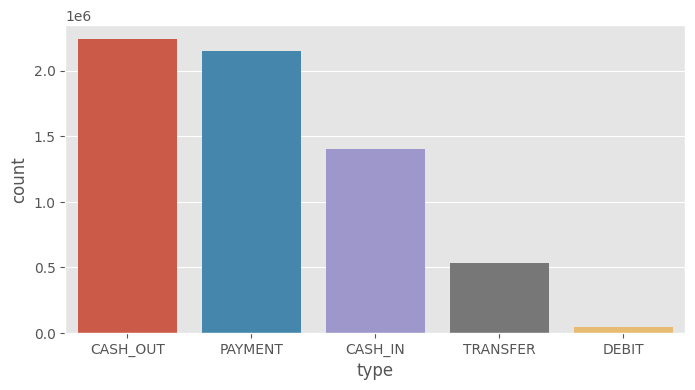

In [6]:
# Gráfico tipos de transações
plt.figure(figsize=(8,4))

sns.countplot(data = df, x = 'type', order=df['type'].value_counts().index)

In [7]:
# Contagem de transações que foram sinalizadas como fraude
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [8]:
# Contagem de transações que foram identificadas como fraude
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
# Excluindo duplicatas
df.drop_duplicates(keep=False, inplace=True)

[Text(0, 0, '2.23338e+06'),
 Text(0, 0, '2.1515e+06'),
 Text(0, 0, '1.39928e+06'),
 Text(0, 0, '528812'),
 Text(0, 0, '41432')]

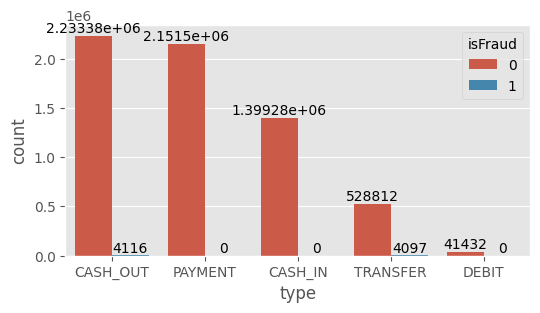

In [10]:
# Gráfico de transações que são fraude por tipo de transações
plt.figure(figsize=(6,3))

ax = sns.countplot(data = df, x = 'type', 
                   order=df['type'].value_counts().index,   # ordem decrescente
                   hue='isFraud')                           # separando transações legitimas de fraude

# Exibir contagem no gráfico
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])

Somente as transações "CASH_OUT" e "TRANSFER" apresentam fraude.<br>
A variável "type" pode ter uma grande importancia para o modelo.

In [11]:
# Tabela de transações que são fraude por tipo de transações
fraude = df.groupby('isFraud')['type'].value_counts().to_frame()
fraude.columns = ['quantidade']
fraude

quantidade
isFraud type                
0       CASH_OUT     2233384
        PAYMENT      2151495
        CASH_IN      1399284
        TRANSFER      528812
        DEBIT          41432
1       CASH_OUT        4116
        TRANSFER        4097

In [12]:
# Conta de destino de transações fraudulentas
df[df['isFraud'] == 1]['nameDest'].value_counts()

C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

In [13]:
# Análise descritiva de quantidade envolvida nas transações fraudulentas
df[df['isFraud'] == 1]['amount'].describe()

count       8213.00
mean     1467967.30
std      2404252.95
min            0.00
25%       127091.33
50%       441423.44
75%      1517771.48
max     10000000.00
Name: amount, dtype: float64

<Axes: xlabel='amount', ylabel='Count'>

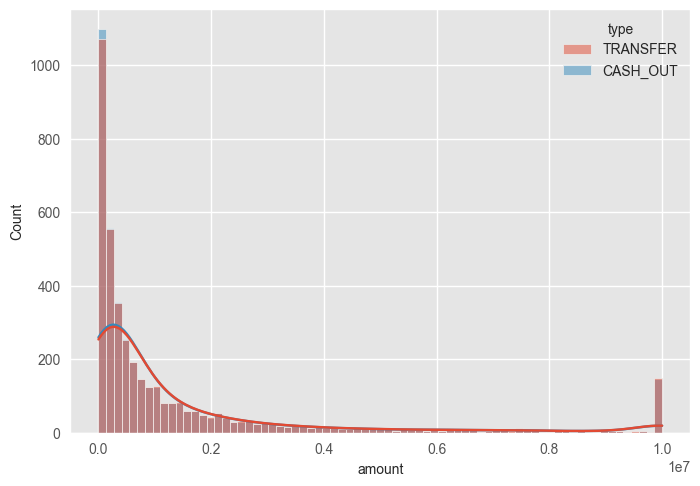

In [14]:
# Histograma de quantidade envolvida nas transações fraudulentas
sns.histplot(df[df['isFraud'] == 1], x = 'amount', kde = True, hue='type')

Investigando o comportamento da variável "amount" nas transações fraudulentas podemos observar que elas se comportam de maneira similar nos dois tipos de transações.

<Axes: xlabel='amount', ylabel='Count'>

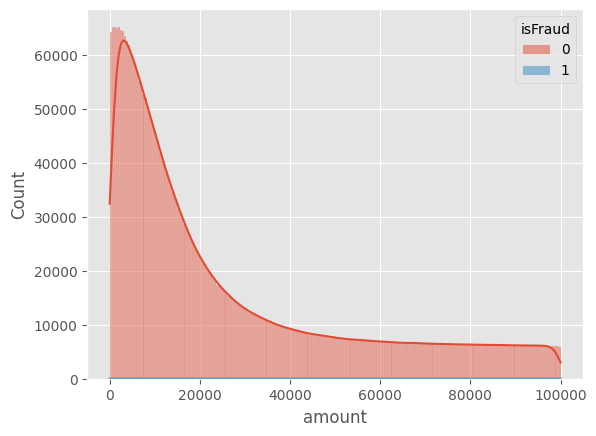

In [15]:
# Histograma de quantidade envolvida, comparando transações fraudulentas e legítimas
sns.histplot(df[df['amount'] < 100000], x = 'amount', kde = True, hue='isFraud')

In [17]:
df[df['isFraud'] == 1].shape[0]/df.shape[0]*100

0.12908204481801522

A visualização para todo o data set não trouxe informações adicionais, pois como apresenta grande amplitude dos valores com contagem relativamente baixa, então não foi possivel obter informações a partir dessa visualização.<br>
Quando limitamos o valor para menos de 1000000 conseguimos observar uma sobreposição de valores das transações legítimas e fraude, porém com menor contagem, ja que as fraudes contabilizam somente 0.12% do dataset.

In [20]:
# Análise descritiva das variáveis numéricas agrupadas por ser ou não fraude
df.groupby('isFraud').describe().T

isFraud                         0            1
step           count   6354407.00      8213.00
               mean        243.24       368.41
               std         142.14       216.39
               min           1.00         1.00
               25%         156.00       181.00
               50%         239.00       367.00
               75%         334.00       558.00
               max         718.00       743.00
amount         count   6354407.00      8213.00
               mean     178197.04   1467967.30
               std      596236.98   2404252.95
               min           0.01         0.00
               25%       13368.40    127091.33
               50%       74684.72    441423.44
               75%      208364.76   1517771.48
               max    92445516.64  10000000.00
oldbalanceOrg  count   6354407.00      8213.00
               mean     832828.71   1649667.61
               std     2887144.03   3547719.44
               min           0.00         0.00
               25%           0.00    125822.44
               50%       14069.00    438983.45
               75%      106969.50   1517771.48
               max    43818855.30  59585040.37
newbalanceOrig count   6354407.00      8213.00
               mean     855970.23    192392.63
               std     2924986.96   1965666.46
               min           0.00         0.00
               25%           0.00         0.00
               50%           0.00         0.00
               75%      144730.74         0.00
               max    43686616.33  49585040.37
oldbalanceDest count   6354407.00      8213.00
               mean    1101420.87    544249.62
               std     3399201.79   3336420.95
               min           0.00         0.00
               25%           0.00         0.00
               50%      133311.80         0.00
               75%      944144.58    147828.66
               max   356015889.35 236230516.82
newbalanceDest count   6354407.00      8213.00
               mean    1224925.68   1279707.62
               std     3673815.71   3908816.53
               min           0.00         0.00
               25%           0.00         0.00
               50%      214881.70      4676.42
               75%     1111975.34   1058725.22
               max   356179278.92 236726494.66
isFlaggedFraud count   6354407.00      8213.00
               mean          0.00         0.00
               std           0.00         0.04
               min           0.00         0.00
               25%           0.00         0.00
               50%           0.00         0.00
               75%           0.00         0.00
               max           0.00         1.00

# 4.Pré-Processamento

Nessa etapa faremos primeiro a divisão entre treino e teste antes mesmo de aplicarmos transformações nos dados.<br>
Isso evita que os modelos não estejam enviesados, e nesse caso específico ocorre devido **"DATA-LEAKAGE"**.<br>
O termo se refere ao vazamento de informações dos dados de teste que supostamente não deveriam estar disponiveis para o modelo de treinamento.<br>
Caso façamos as transformações antes de separarmos o conjunto de dado, entre treino e teste, informações de todo o dataset será compartilhado com o modelo. Isso pode resultar em um modelo ja preparado para prever dados que supostamente não deveria ter conhecimento e consequentemente resultar em overfitting (materiais nas referencias).<br>
Podemos fazer todo o processo utilizando ferramentas para criação de pipelines, porém para fins de estudo o proprocessamento foi feito em etapas.

## Train Test Split

Após alguns testes iniciais foi identificado que os melhores dados para serem investigados seriam os selecionados abaixos.<br>
Mais abaixo serão comentados os motivos

In [3]:
# Features
X = df[['step', 'type', 'amount', 'oldbalanceOrg', 
        'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Target para previsão
Y = df['isFraud']


x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.33,   # tamanho do dataset de teste
                                                    stratify = Y,       # balancear target entre treino e teste
                                                    random_state = 42) 

## StandardScaling

Usaremos o StandardScaler pois é um método mais robusto para tratar variáveis numéricas (comparado ao MinMaxScaler), sendo menos influenciável por valores discrepantes, podendo auxiliar na performance dos nossos modelos.

In [4]:
# Variáveis numéricas
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Instanciando o StandarScaler
scaler = StandardScaler()

# Fit_transform das variáveis numéricas do treino
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

# Transform das variáveis numéricas do teste
x_test[num_cols] = scaler.transform(x_test[num_cols])

## OneHotEncoding

O método escolhido para processar variáveis categóricas foi o OnehotEncoding. Porém ele tem uma limitação, que é a criação de um dataframe com grandes dimensões quando há muitas categorias em uma variável. Nesse caso não teremos esse problema pois as colunas contendo muitas categorias não serão utilizadas.

In [5]:
# Variável categórica
cat_cols = ['type']

# Instanciando OneHotEncoder
ohe = OneHotEncoder()

# Fit_transform da variável categórica do treino
encoding_train = ohe.fit_transform(x_train[cat_cols])

# Transform da variável categórica do teste
encoding_test = ohe.transform(x_test[cat_cols])


# Transformando dado tratado em dataframe
df_encoding_train = pd.DataFrame(encoding_train.toarray(),                      # transformando em array
                                 columns=ohe.get_feature_names_out(cat_cols))   # resgantando nomes da variável

# Transformando dado tratado em dataframe
df_encoding_test = pd.DataFrame(encoding_test.toarray(),                        # transformando em array 
                                columns=ohe.get_feature_names_out(cat_cols))    # resgantando nomes da variável

# Reagrupando dados em um unico dataframe de treino
x_train = pd.concat([x_train.reset_index(drop=True), df_encoding_train], axis=1)
x_train.drop(cat_cols, axis=1, inplace=True)

# Reagrupando dados em um unico dataframe de teste
x_test = pd.concat([x_test.reset_index(drop=True), df_encoding_test], axis=1)
x_test.drop(cat_cols, axis=1, inplace=True)

# 5.Modelagem

Para a avaliação da performance dos modelos utilizaremos algumas métricas, que guiarão as decisões para adoção do modelo mais adequado para ser implementado.<br>
Queremos ser o mais precisos possível, e o objetivo maior que buscamos é 1) detectar fraudes, 2) reduzir os possíveis casos de fraude que não são detectados como fraude e 3) diminuir numeros de transações legitimas que podem ser interpretadas como fraude. Tudo isso levando em conta o tempo que o modelo leva para executar as análises e tomada de decisão.<br>
Para isso utilizaremos:
- Acurácia
- Precision
- Recall
- F1 Score
- Curva ROC/AUC
- Tempo de execução do modelo


## Regressão Logística - Modelo base

### Treino e teste do modelo

In [7]:
# Iniciando contagem do tempo do modelo
tempo_inic_lr = time.time()

# Instanciando modelo
lr = LogisticRegression()

# Fit do modelo nos dados
lr.fit(x_train, y_train)

# Fazendo previsões com os dados de teste

tempo_inic_predict_lr = time.time()

y_pred_lr = lr.predict(x_test)

tempo_final_predict_lr = time.time()

# Finalizando contagem do tempo do modelo
tempo_final_lr = time.time()

# Calculo do tempo de de execução
tempo_total_lr = tempo_final_lr - tempo_inic_lr

tempo_total_predict_lr = tempo_final_predict_lr - tempo_inic_predict_lr

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [8]:
tempo_proc_trans_lr = round(tempo_total_predict_lr/x_test.shape[0]*1000, 6)

### Métricas

In [10]:
print("="*54)
print(f'Metricas para classificação com Regressão Logística')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_lr, 3)} segundos")
print(f'Tempo para processar uma transação: {tempo_proc_trans_lr} segundos')
print("-"*54)

Metricas para classificação com Regressão Logística
Tempo de execução do modelo: 41.388 segundos
Tempo para processar uma transação: 0.00014 segundos
------------------------------------------------------


X does not have valid feature names, but LogisticRegression was fitted with feature names


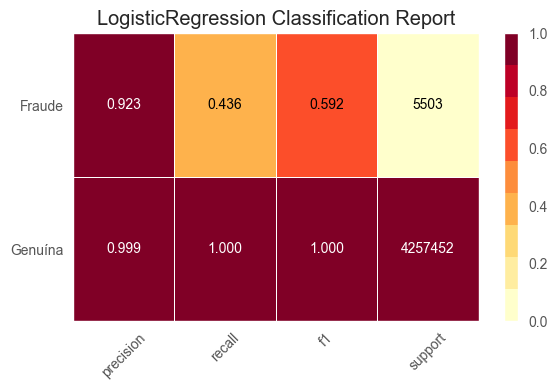

In [11]:
# Classification Report
classes = ['Genuína', 'Fraude']

plt.figure(figsize=(6, 4))

viz = classification_report(
    lr, x_train, y_train, classes = classes, support = True
)

X does not have valid feature names, but LogisticRegression was fitted with feature names


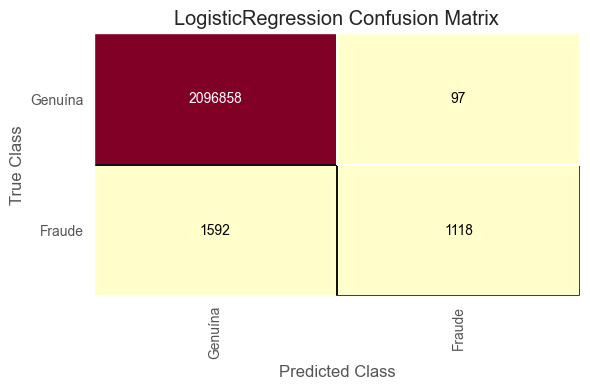

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [12]:
# Matriz de confusão
plt.figure(figsize=(6,4))

cm = ConfusionMatrix(
    lr, classes = classes
)

cm.fit(x_train, y_train)

cm.score(x_test, y_test)

cm.show()

X does not have valid feature names, but LogisticRegression was fitted with feature names


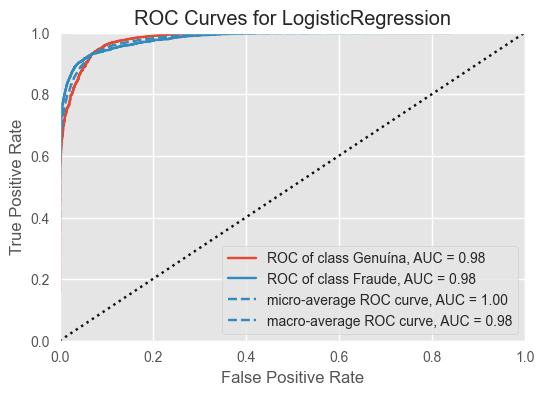

<Figure size 800x550 with 0 Axes>

In [13]:
plt.figure(figsize=(6,4))

roc_auc(lr,  X_train = x_train, y_train = y_train, X_test = x_test, y_test = y_test, classes = classes)

plt.tight_layout()

X does not have valid feature names, but LogisticRegression was fitted with feature names


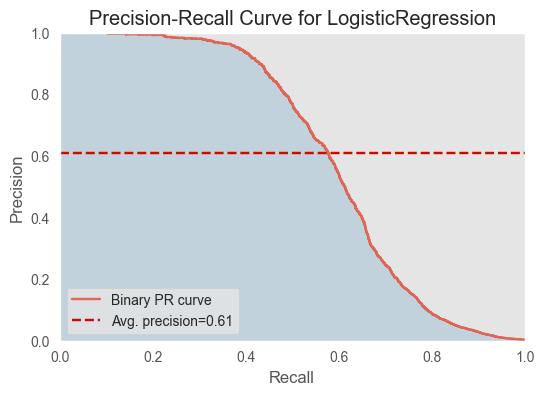

<Figure size 800x550 with 0 Axes>

In [14]:
# Curva Precision-Recall
plt.figure(figsize=(6,4))

viz = precision_recall_curve(lr, x_train, y_train, x_test, y_test)

plt.tight_layout()

Devido o desbalanceamento do dataset (fraudes em proporção muito menor do que as transações legitimas) devemos tomar cuidado com algumas métricas. Podemos obserrvar que o Recall (proporção de fraudes detectadas corretamente dentro das transações fraudulentas) está abaixo de 40%.<br>
Podemos investigar mais a fundo nossa opções para aprimorar o modelo, identificar variáveis importantes e excluir as que geram ruído no modelo ou explorar modelos mais adequados.<br>
No que diz respeito a capacidade de processamento vemos que a regressão logistica conseguiu processar um transação a cada 0.000149 segundos. Esse dado é importante pois se tratando de um modelo que tem de operar em tempo real para detectar possíveis fraudes é importante termos um modelo que nos de uma resposta rápida.

### Variáveis influentes

Uma maneira de aumentar a performance do modelo, é selecionando as variáveis mais influentes, aquelas que realmente contribuem para que o modelo faça previsões mais precisas e eliminando aquelas que geram ruidos aumentam a complexidade e diminuiem performance.<br>
Esses métodos podem ser divididos em:
- Filter (testes estatisticos para avaliar relação das features com target)
    - Coeficiente de correlação
    - SelectKBest
    - SelectFromModel
    - Mutual information
    - Teste Chi Quadrado
- Wrappper (métodos baseados em performance de modelos treinados com diferentes combinações de variáveis)
    - RFE
    - Foward/backward feature selection
- Embedded (combinação de seleção de variáveis com treino de modelos)
    - Lasso
    - Ridge
    - Elastic Net
- Dimensionality reduction
    - PCA
    - LDA
    - t-SNE<br>

Para regressão logistic usaremos RFE e SelectFromModel

#### RFE

In [22]:
# Instanciando RFE
rfe_lr = RFE(estimator = lr, n_features_to_select = 7)

# Fit RFE
rfe_lr.fit(x_train, y_train)

# Selecionando as 7 variáveis mais influentes
x_train_lr_rfe = rfe_lr.transform(x_train)
x_test_lr_rfe = rfe_lr.transform(x_test)

# Fit do modelo de regressão logistica com as variáveis selecionadas pelo RFE
lr.fit(x_train_lr_rfe, y_train)

# Previsão
y_pred_lr_rfe = lr.predict(x_test_lr_rfe)

accuracy_lr_rfe = lr.score(x_test_lr_rfe, y_test)
print("Acurácia geral usando RFE:", accuracy_lr_rfe)

Acurácia geral usando RFE: 0.999153674514744


In [23]:
# retornando nome das variáveis
rfe_lr_support = rfe_lr.support_
rfe_lr_features = x_train.columns[rfe_lr_support]
print("Features selecionadas:", rfe_lr_features)

Features selecionadas: Index(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'type_CASH_IN', 'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')


#### SelectFromModel

In [24]:
# Instanciando modelo
lr_sfm = LogisticRegression()

# Fit do modelo
lr_sfm = lr_sfm.fit(x_train, y_train)

# Instanciando SelectFromModel
lr_sfm = SelectFromModel(lr_sfm, prefit=True, max_features=7)

# Fit do modelo com as variáveis selecionadas
x_train_lr_sfm = lr_sfm.transform(x_train)

lr_sfm_features = x_train.columns[lr_sfm.get_support()]

print("Features selecionadas:", lr_sfm_features)

Features selecionadas: Index(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], dtype='object')


Podemos observar que algumas variáveis são identificadas como mais relevantes para o modelo. Isso pode nos ajudar a otimizar o modelo de regressão logística. Porém vamos explorar outras opções de modelos que podem trazer melhores resultados.

## Árvore de decisão

### Treino e teste do modelo

In [15]:
# Iniciando contagem do tempo do modelo
tempo_inic_tree = time.time()

# Instanciando modelo
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 42)

# tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 42, ccp_alpha=0.0001)

# Fit do modelo nos dados
tree.fit(x_train, y_train)

# Fazendo previsões com os dados de teste

tempo_inic_predict_tree = time.time()

y_pred_tree = tree.predict(x_test)

tempo_final_predict_tree = time.time()

# Finalizando contagem do tempo do modelo
tempo_final_tree = time.time()

# Calculo do tempo de execução
tempo_total_tree = tempo_final_tree - tempo_inic_tree

tempo_total_predict_tree = tempo_final_predict_tree - tempo_inic_predict_tree

In [16]:
tempo_proc_trans_tree = round(tempo_total_predict_tree/x_test.shape[0]*10000, 6)

### Métricas

In [17]:
print("="*54)
print(f'Metricas para classificação com Árvore de Decisão')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_tree, 3)} segundos")
print(f'Tempo para processar uma transação: {tempo_proc_trans_tree} segundos')
print("-"*54)

Metricas para classificação com Árvore de Decisão
Tempo de execução do modelo: 48.188 segundos
Tempo para processar uma transação: 0.00082 segundos
------------------------------------------------------


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


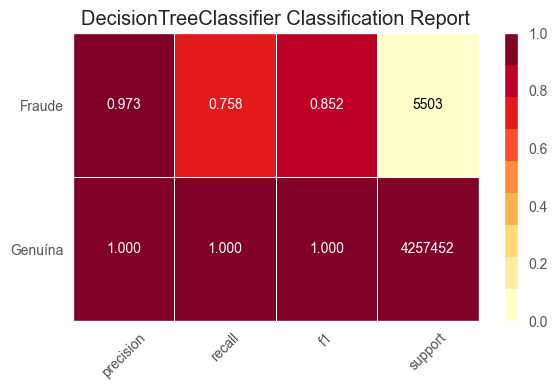

In [18]:
# Classification Report
classes = ['Genuína', 'Fraude']

plt.figure(figsize=(6, 4))

viz = classification_report(
    tree, x_train, y_train, classes = classes, support = True
)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


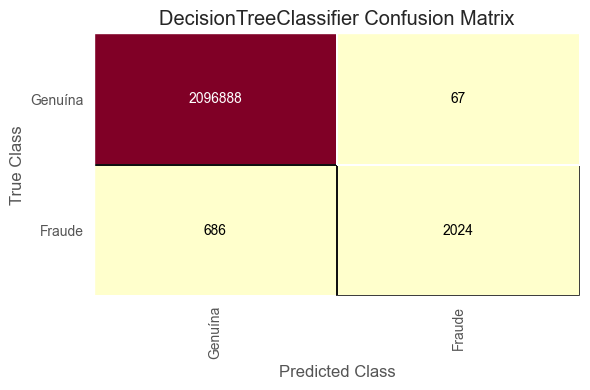

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
# Matriz de confusão
plt.figure(figsize=(6,4))

cm = ConfusionMatrix(
    tree, classes = classes
)

cm.fit(x_train, y_train)

cm.score(x_test, y_test)

cm.show()

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


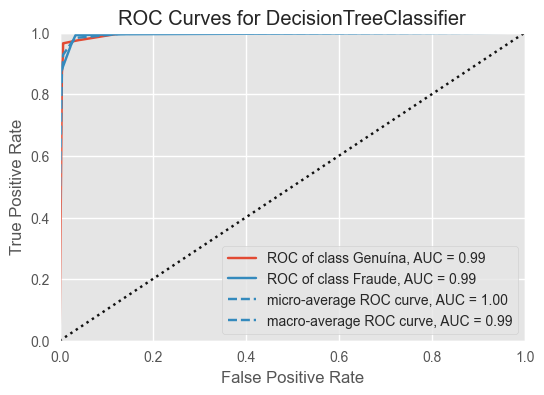

<Figure size 800x550 with 0 Axes>

In [20]:
plt.figure(figsize=(6,4))

roc_auc(tree,  X_train = x_train, y_train = y_train, X_test = x_test, y_test = y_test, classes = classes)

plt.tight_layout()

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


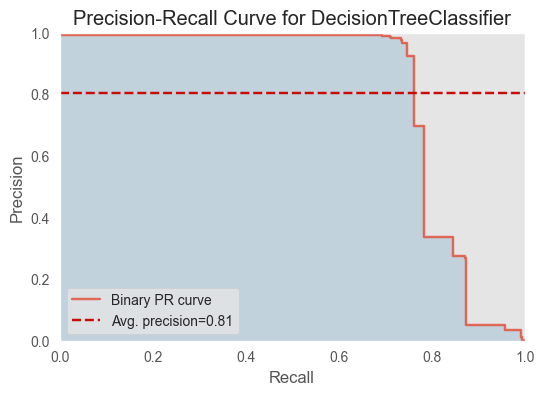

<Figure size 800x550 with 0 Axes>

In [21]:
# Curva Precision-Recall
plt.figure(figsize=(6,4))

viz = precision_recall_curve(tree, x_train, y_train, x_test, y_test)

plt.tight_layout()

Com a árvore de decisão já conseguimos obter algumas métricas melhoras. Conseguimos identificar em número maior as transações de fraude, diminuindo também o número de transações genuínas que foram interpretadas como fraude (evitando mais atritos com clientes). Também tivemos um modelo que conseguiu processar a transação de uma maneira muito rapida, um pouco mais demorado que uma regressão logistica, porém com melhores métricas.

### Variáveis influentes

#### Feature_importance

In [28]:
# Identificando valores de importancia e transformando em dataframe
tree_importance = pd.DataFrame(tree.feature_importances_, index=x_train.columns)
tree_importance.columns = ['importancia']
tree_importance.sort_values(by='importancia', ascending=False)  # organizando em ordem decrescente

,importancia
oldbalanceOrg,0.33
newbalanceDest,0.22
amount,0.17
newbalanceOrig,0.09
type_TRANSFER,0.07
type_CASH_OUT,0.05
step,0.04
oldbalanceDest,0.03
type_CASH_IN,0.00
type_DEBIT,0.00


<Axes: title={'center': 'Árvore de decisão: Feature Importance'}>

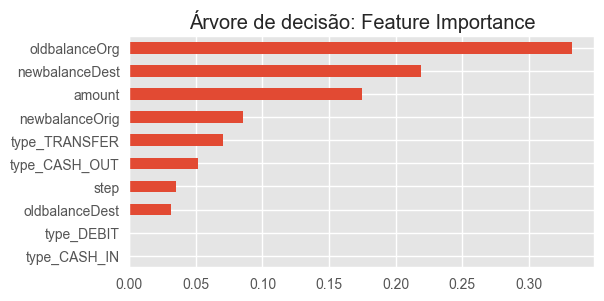

In [29]:
# Gráfico de feature importance
plt.figure(figsize=(6, 3))

plt.title('Árvore de decisão: Feature Importance')
tree_importances = pd.Series(tree.feature_importances_, index= x_train.columns)
tree_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

#### RFE

In [30]:
rfe_tree = RFE(estimator = tree, n_features_to_select = 7)

rfe_tree.fit(x_train, y_train)

x_train_tree_rfe = rfe_tree.transform(x_train)
x_test_tree_rfe = rfe_tree.transform(x_test)

tree.fit(x_train_tree_rfe, y_train)

y_pred_tree_rfe = tree.predict(x_test_tree_rfe)

accuracy_tree_rfe = tree.score(x_test_tree_rfe, y_test)
print("Acurácia geral usando RFE:", accuracy_tree_rfe)

Acurácia geral usando RFE: 0.9996194631048286


In [31]:
rfe_tree_support = rfe_tree.support_
rfe_tree_features = x_train.columns[rfe_tree_support]
print("Features selecionadas:", rfe_tree_features)

Features selecionadas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest',
       'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')


#### SelectFromModel

In [32]:
tree_sfm = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 42)

tree_sfm = tree_sfm.fit(x_train, y_train)

tree_sfm = SelectFromModel(tree_sfm, prefit=True, max_features=7)

x_train_tree_sfm = tree_sfm.transform(x_train)

tree_sfm_features = x_train.columns[tree_sfm.get_support()]

print("Features selecionadas:", tree_sfm_features)

Features selecionadas: Index(['amount', 'oldbalanceOrg', 'newbalanceDest'], dtype='object')


Como observado no modelo de regressão conseguimos identificar algumas variáveis que são mais importantes para o nosso modelo. Podemos tenatr aprimorar a nossa árvore utilizando as variáveis mais relevantes.

## Random Forest

### Treino e teste do modelo

In [22]:
tempo_inic_rnd = time.time()

rnd = RandomForestClassifier(n_estimators = 5, random_state = 42, n_jobs= -1)

rnd.fit(x_train, y_train)

tempo_inic_predict_rnd = time.time()

y_pred_rnd = rnd.predict(x_test)

tempo_final_predict_rnd = time.time()

tempo_final_rnd = time.time()

tempo_total_rnd = tempo_final_rnd - tempo_inic_rnd

tempo_total_predict_rnd = tempo_final_predict_rnd - tempo_inic_predict_rnd

In [23]:
tempo_proc_trans_rnd = round(tempo_total_predict_rnd/x_test.shape[0]*1000, 6)

### Métricas

In [24]:
print("="*54)
print(f'Metricas para classificação com Random Forest')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_rnd, 3)} segundos")
print(f'Tempo para processar uma transação: {round(tempo_total_predict_rnd/x_test.shape[0]*1000, 6)} segundos')
print("-"*54)

Metricas para classificação com Random Forest
Tempo de execução do modelo: 36.881 segundos
Tempo para processar uma transação: 0.000227 segundos
------------------------------------------------------


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


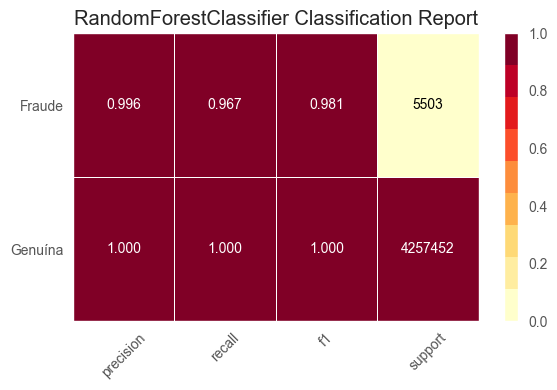

In [25]:
# Classification Report
classes = ['Genuína', 'Fraude']

plt.figure(figsize=(6, 4))

viz = classification_report(
    rnd, x_train, y_train, classes = classes, support = True
)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


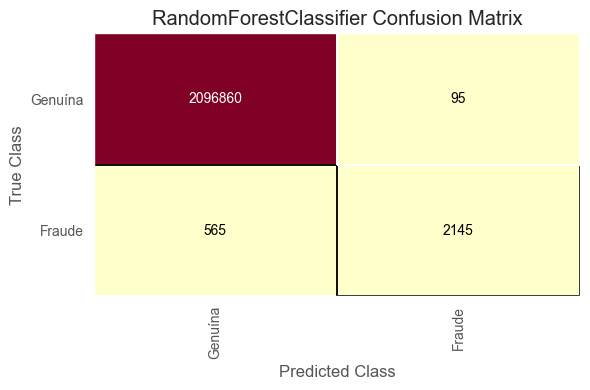

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
# Matriz de confusão
plt.figure(figsize=(6,4))

cm = ConfusionMatrix(
    rnd, classes = classes
)

cm.fit(x_train, y_train)

cm.score(x_test, y_test)

cm.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


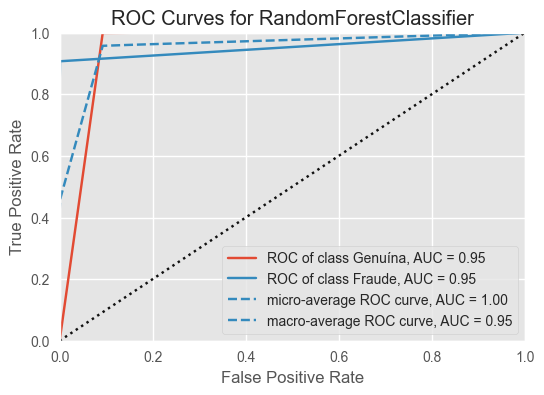

<Figure size 800x550 with 0 Axes>

In [75]:
plt.figure(figsize=(6,4))

roc_auc(rnd,  X_train = x_train, y_train = y_train, X_test = x_test, y_test = y_test, classes = classes)

plt.tight_layout()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


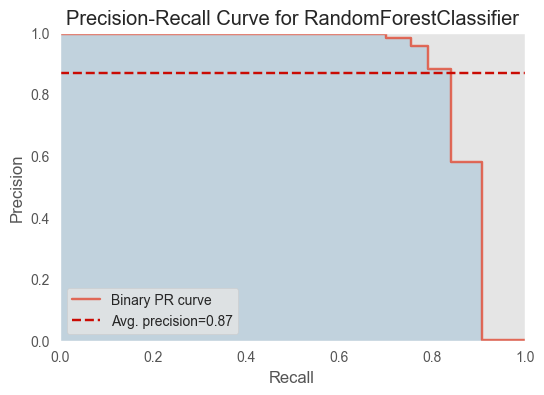

<Figure size 800x550 with 0 Axes>

In [27]:
# Curva Precision-Recall
plt.figure(figsize=(6,4))

viz = precision_recall_curve(rnd, x_train, y_train, x_test, y_test)

plt.tight_layout()

Com Random Forest conseguimos melhorar nossas métricas. Tivemos um aumento discreto no numero de transações genuínas classificadas como fraude mas melhoramos a detecção de transações fraudulentas. Também obtivemos um bom tempo de processamento para cada transação.

### Variáveis influentes

#### Feature_importance

In [37]:
rnd_importance = pd.DataFrame(rnd.feature_importances_, index=x_train.columns)
rnd_importance.columns = ['importancia']
rnd_importance.sort_values(by='importancia', ascending=False)

,importancia
newbalanceDest,0.25
oldbalanceOrg,0.24
amount,0.21
step,0.12
oldbalanceDest,0.06
type_TRANSFER,0.06
newbalanceOrig,0.03
type_CASH_OUT,0.01
type_CASH_IN,0.00
type_PAYMENT,0.00


<Axes: title={'center': 'Random Forest: Feature Importance'}>

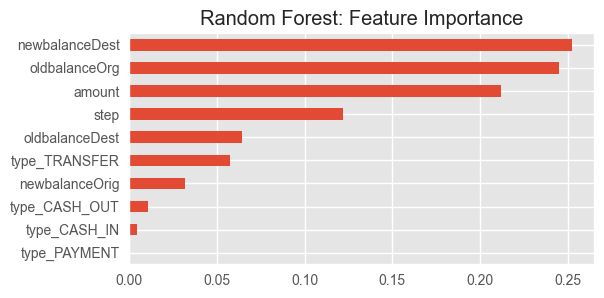

In [38]:
plt.figure(figsize=(6, 3))

plt.title('Random Forest: Feature Importance')
rnd_importances = pd.Series(rnd.feature_importances_, index= x_train.columns)
rnd_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

#### RFE

In [39]:
rfe_rnd = RFE(estimator = rnd, n_features_to_select = 7)

rfe_rnd.fit(x_train, y_train)

x_train_rnd_rfe = rfe_rnd.transform(x_train)
x_test_rnd_rfe = rfe_rnd.transform(x_test)

rnd.fit(x_train_rnd_rfe, y_train)

y_pred_rnd_rfe = rnd.predict(x_test_rnd_rfe)

accuracy_rnd_rfe = rnd.score(x_test_rnd_rfe, y_test)
print("Acurácia geral usando RFE:", accuracy_rnd_rfe)

Acurácia geral usando RFE: 0.9996770913455242


In [40]:
rfe_rnd_support = rfe_rnd.support_
rfe_rnd_features = x_train.columns[rfe_rnd_support]
print("Features selecionadas:", rfe_rnd_features)

Features selecionadas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_TRANSFER'],
      dtype='object')


#### SelectFromModel

In [41]:
rnd_sfm = RandomForestClassifier(n_estimators = 5, random_state = 42)

rnd_sfm = rnd_sfm.fit(x_train, y_train)

rnd_sfm = SelectFromModel(rnd_sfm, prefit=True, max_features=7)

x_train_rnd_sfm = rnd_sfm.transform(x_train)

rnd_sfm_features = x_train.columns[rnd_sfm.get_support()]

print("Features selecionadas:", rnd_sfm_features)

Features selecionadas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceDest'], dtype='object')


#### SHapley Additive exPlanations (SHAP)

In [28]:
# Criar um objeto "explicador" usando os dados de treino
explainer = shap.Explainer(rnd, x_train)

# Computar valores SHAP para dados de teste
shap_values = explainer(x_test, check_additivity=False)

# Plotar predição para o modelo
shap.summary_plot(shap_values, x_test, title = "Importancia das features para o modelo - SHAP")

## XGBoost

### Treino e teste do modelo

In [29]:
tempo_inic_xgb = time.time()

params = {'learning_rate': 0.1,
          'colsample_bytree' : 0.3,
          'max_depth': 10,
          'objective': 'binary:logistic',
          'alpha' : 10,
          'n_estimators': 100}

xgb = XGBClassifier(**params)

xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric='auc', verbose=False)

tempo_inic_predict_xgb = time.time()

y_pred_xgb = xgb.predict(x_test)

tempo_final_predict_xgb = time.time()

tempo_final_xgb = time.time()

tempo_total_xgb = tempo_final_xgb - tempo_inic_xgb

tempo_total_predict_xgb = tempo_final_predict_xgb - tempo_inic_predict_xgb

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


In [30]:
tempo_proc_trans_xgb = round(tempo_total_predict_xgb/x_test.shape[0]*1000, 6)

### Métricas

In [31]:
print("="*54)
print(f'Metricas para classificação com XGBoost')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_xgb, 3)} segundos")
print(f'Tempo para processar uma transação: {tempo_proc_trans_xgb} segundos')
print("-"*54)

Metricas para classificação com XGBoost
Tempo de execução do modelo: 289.082 segundos
Tempo para processar uma transação: 0.000538 segundos
------------------------------------------------------


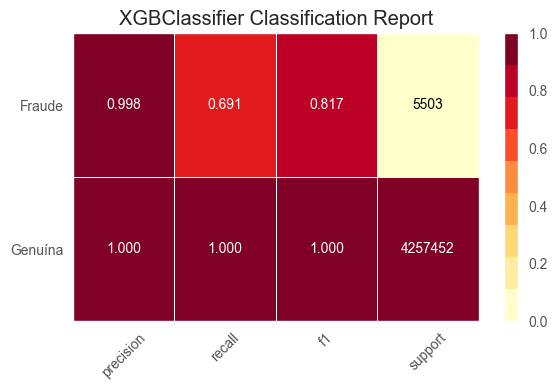

In [32]:
# Classification Report
classes = ['Genuína', 'Fraude']

plt.figure(figsize=(6, 4))

viz = classification_report(
    xgb, x_train, y_train, classes = classes, support = True
)

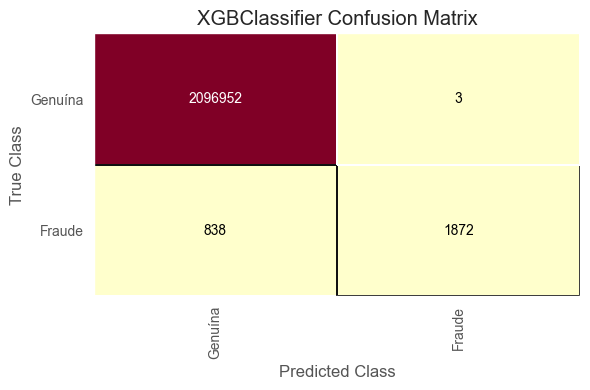

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
# Matriz de confusão
plt.figure(figsize=(6,4))

cm = ConfusionMatrix(
    xgb, classes = classes
)

cm.fit(x_train, y_train)

cm.score(x_test, y_test)

cm.show()

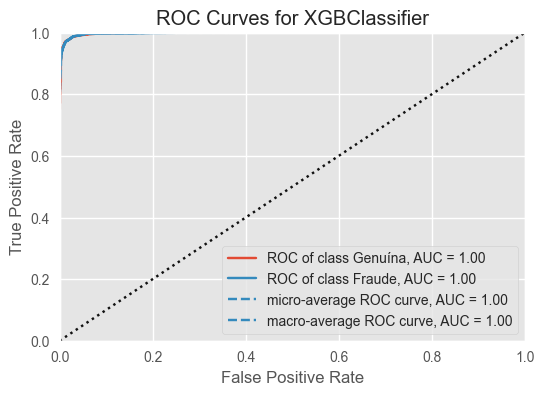

<Figure size 800x550 with 0 Axes>

In [34]:
plt.figure(figsize=(6,4))

roc_auc(xgb,  X_train = x_train, y_train = y_train, X_test = x_test, y_test = y_test, classes = classes)

plt.tight_layout()

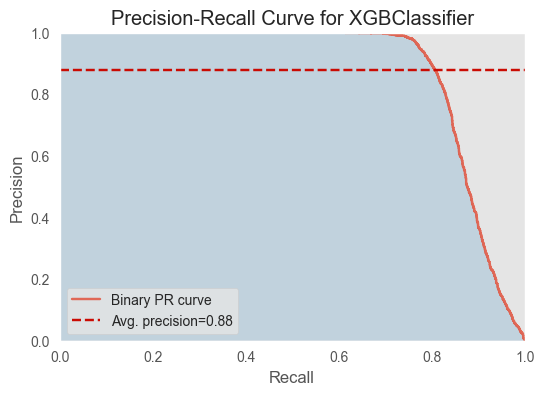

<Figure size 800x550 with 0 Axes>

In [36]:
# Curva Precision-Recall
plt.figure(figsize=(6,4))

viz = precision_recall_curve(xgb, x_train, y_train, x_test, y_test)

plt.tight_layout()

Com XGboost conseguimos diminuir a detecção de transações genuinas como fraude, porém o número de transações fraudulentas que foram consideradas genuínas voltaram a aumentar.<br>

### Variáveis influentes

#### Feature_importance

In [46]:
xgb_importance = pd.DataFrame(xgb.feature_importances_, index=x_train.columns)
xgb_importance.columns = ['importancia']
xgb_importance.sort_values(by='importancia', ascending=False)

,importancia
newbalanceOrig,0.28
type_TRANSFER,0.16
type_PAYMENT,0.10
type_CASH_OUT,0.10
oldbalanceOrg,0.09
newbalanceDest,0.07
type_CASH_IN,0.07
oldbalanceDest,0.05
amount,0.04
step,0.03


<Axes: title={'center': 'XHBoost: Feature Importance'}>

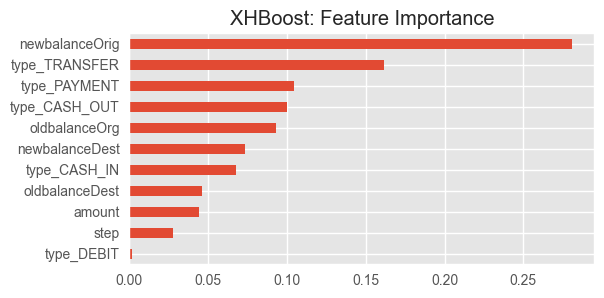

In [52]:
plt.figure(figsize=(6, 3))

plt.title('XGBoost: Feature Importance')
xgb_importances = pd.Series(xgb.feature_importances_, index= x_train.columns)
xgb_importances.nlargest(11).sort_values(ascending=True).plot(kind='barh')

## Outras técnicas de seleção de features

#### SelectKBest

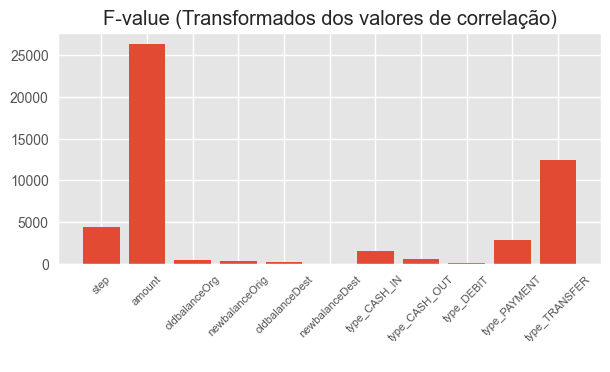

In [62]:
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(x_train, y_train)
x_teste_fs = f_selector.transform(x_test)

col_names = x_train.columns


plt.figure(figsize=(7,3))
ax = plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel(" ")
plt.xticks(range(len(col_names)), col_names, fontsize=8, rotation = 45)
plt.title("F-value (Transformados dos valores de correlação)")
plt.show()

#### Mutual_info_class

In [57]:
f_selector_2 = SelectKBest(score_func=mutual_info_classif, k=5)
f_selector_2.fit(x_train, y_train)
x_teste_fs_2 = f_selector_2.transform(x_test)

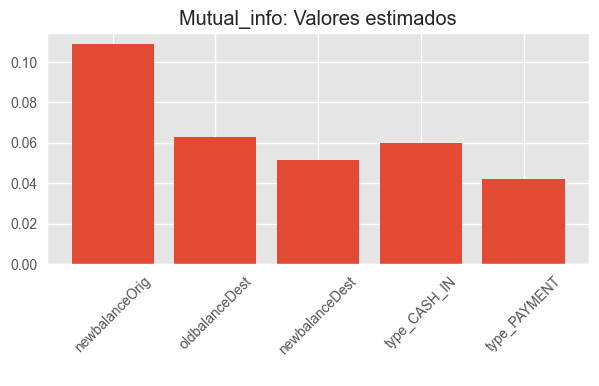

In [65]:
mask = f_selector_2.get_support()          # "mascara" para as features selecionadas
selected_features = x_train.columns[mask]  # index para colunas originais usando a mascara

plt.figure(figsize=(7,3))
plt.bar(selected_features, f_selector_2.scores_[mask])
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.title("Mutual_info: Valores estimados")
plt.show()

#### Lasso

In [66]:
alphas = [0.001, 0.01, 0.1, 1, 10]

lasso = LassoCV(cv=5, random_state=101, alphas = alphas)

lasso.fit(x_train, y_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, random_state=101)

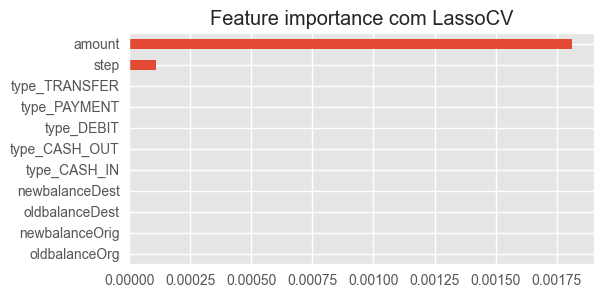

In [68]:
coef = pd.Series(lasso.coef_, index=x_train.columns)

imp_coef = coef.sort_values()

plt.rcParams['figure.figsize'] = (6, 3)
imp_coef.plot(kind="barh")
plt.title("Feature importance com LassoCV")
plt.show()

#### Permutation importance

In [12]:
# assuming X_train and y_train have already been defined
# xgb_permut = XGBClassifier().fit(x_train, y_train)

# calculate permutation importance
result_permut = permutation_importance(xgb, x_test, y_test, n_repeats=10, 
                                       random_state=0, n_jobs = -1)

# print the feature importances (in descending order)
importances = result_permut.importances_mean
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, x_test.columns[indices[f]], importances[indices[f]]))

1. oldbalanceOrg (0.000694)
2. newbalanceDest (0.000466)
3. amount (0.000427)
4. type_TRANSFER (0.000400)
5. newbalanceOrig (0.000191)
6. oldbalanceDest (0.000131)
7. type_CASH_OUT (0.000122)
8. step (0.000107)
9. type_PAYMENT (0.000076)
10. type_CASH_IN (0.000068)
11. type_DEBIT (0.000000)


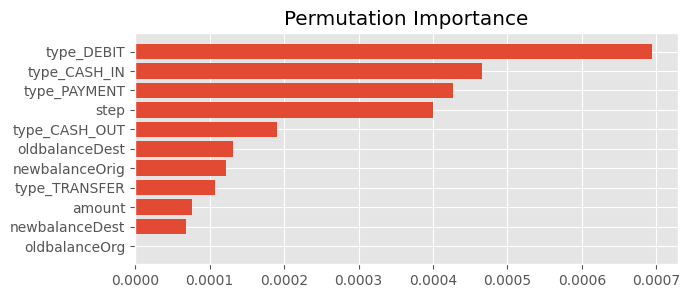

In [13]:
# plot feature importances
plt.figure(figsize = (7, 3))
plt.title("Permutation Importance")
plt.barh(range(x_test.shape[1]), importances[indices][::-1])
plt.yticks(range(x_test.shape[1]), x_test.columns[indices])
plt.show()

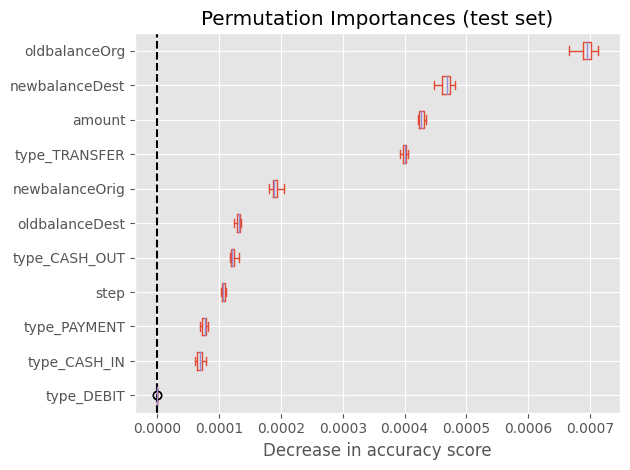

In [14]:
sorted_importances_idx = result_permut.importances_mean.argsort()
importances = pd.DataFrame(
    result_permut.importances[sorted_importances_idx].T,
    columns=x_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

Novamente podemos observar a importancia das variáveis para o modelo, e usa-las para aprimorar seus resultados.

# 6.Sumarizando Resultados

In [37]:
modelos_dic = {
    "Regresão Logistica":{
        "Acurácia": accuracy_score(y_test, y_pred_lr).round(3),
        "Precision": precision_score(y_test, y_pred_lr).round(3),
        "Recall": recall_score(y_test, y_pred_lr).round(3),
        "F1 score": f1_score(y_test, y_pred_lr).round(3),
        "Execução (s)": round(tempo_total_lr, 3),
        "Processamento/transação (s)": tempo_proc_trans_lr
    },
    "Árvore Decisão":{
        "Acurácia": accuracy_score(y_test, y_pred_tree).round(3),
        "Precision": precision_score(y_test, y_pred_tree).round(3),
        "Recall": recall_score(y_test, y_pred_tree).round(3),
        "F1 score": f1_score(y_test, y_pred_tree).round(3),
        "Execução (s)": round(tempo_total_tree, 3),
        "Processamento/transação (s)": tempo_proc_trans_tree
    },
    "Random Forest":{
        "Acurácia": accuracy_score(y_test, y_pred_rnd).round(3),
        "Precision": precision_score(y_test, y_pred_rnd).round(3),
        "Recall": recall_score(y_test, y_pred_rnd).round(3),
        "F1 score": f1_score(y_test, y_pred_rnd).round(3),
        "Execução (s)": round(tempo_total_rnd, 3),
        "Processamento/transação (s)": tempo_proc_trans_rnd
    },
    "XGBoost":{
        "Acurácia": accuracy_score(y_test, y_pred_xgb).round(3),
        "Precision": precision_score(y_test, y_pred_xgb).round(3),
        "Recall": recall_score(y_test, y_pred_xgb).round(3),
        "F1 score": f1_score(y_test, y_pred_xgb).round(3),
        "Execução (s)": round(tempo_total_xgb, 3),
        "Processamento/transação (s)": tempo_proc_trans_xgb
    }   
}

In [50]:
modelos_sumario = pd.DataFrame(modelos_dic)

In [55]:
resultado_modelos = modelos_sumario.T.sort_values(by = 'Recall', ascending = False)

In [58]:
resultado_modelos['Processamento/transação (s)'] = resultado_modelos['Processamento/transação (s)'].map('{:.6f}'.format)

# 7.Tunning hiperparams

Podemos tentar aprimorar nossos modelos investigando os hiperparametros usados.<br>
Somente a titulo de curiosidade iremos executar alguns recursos.

## RandomSearch

In [80]:
# Hiperparametors para Random Forest
rnd_params = {'n_estimators': [10, 20], 'max_depth': [8, 12],
              'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2, 4]}

# Hiperparametros para arvore de decisão
tree_params = {'max_depth': [8, 12], 'min_samples_split': [2, 4],
               'min_samples_leaf': [1, 2, 4]}


In [81]:
def busca_param(x, y, teste=None, modelo=None):
    if modelo == 'rnd':
        rnd = RandomForestClassifier()
        rs = RandomizedSearchCV(rnd, rnd_params, n_iter=5, cv=4, random_state=42, verbose=2)
    else:
        tree = DecisionTreeClassifier()
        rs = RandomizedSearchCV(tree, tree_params, n_iter=5, cv=4, random_state=42, verbose=2)
    
    rs.fit(x, y)
    
    print(f'RandomizedSearchCV: Modelo {modelo}, Teste {teste}')
    print(f"Melhores parametros para {modelo.capitalize()}: {rs.best_params_}")


### Decision Tree

In [ ]:
busca_param(x_train, y_train, teste = 1, modelo = 'tree')

In [82]:
tempo_inic_tree_teste = time.time()

tree_teste = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 4, max_depth = 12)

tree_teste.fit(x_train, y_train)

y_pred_tree_teste = tree_teste.predict(x_test)

tempo_final_tree_teste = time.time()

tempo_total_tree_teste = tempo_final_tree_teste - tempo_inic_tree_teste

Metricas para Decision Tree RandomSearchCV
Tempo de execução do modelo: 57.812 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.96
Recall: 0.758


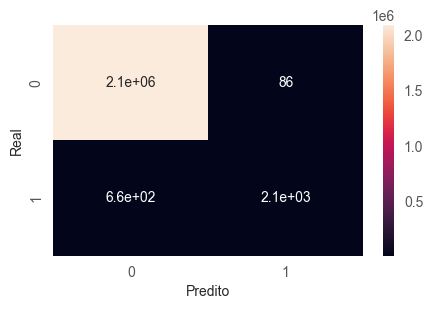

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.76      0.85      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.88      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [83]:
print("="*54)
print(f'Metricas para Decision Tree RandomSearchCV')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_tree_teste, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_tree_teste).round(3))
print("Precision:", precision_score(y_test, y_pred_tree_teste).round(3))
print("Recall:", recall_score(y_test, y_pred_tree_teste).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_tree_teste, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_tree_teste))
print('-'*54)

### Random Forest

In [ ]:
busca_param(x_train, y_train, teste = 1, modelo = 'rnd')

In [90]:
tempo_inic_rnd_rs = time.time()

rnd_rs = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, 
                                   min_samples_leaf = 4, max_depth = 12)

rnd_rs.fit(x_train, y_train)

y_pred_rnd_rs = rnd_rs.predict(x_test)

tempo_final_rnd_rs = time.time()

tempo_total_rnd_rs = tempo_final_rnd_rs - tempo_inic_rnd_rs

Metricas para Random Forest RandomSearchCV
Tempo de execução do modelo: 162.164 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.992
Recall: 0.739


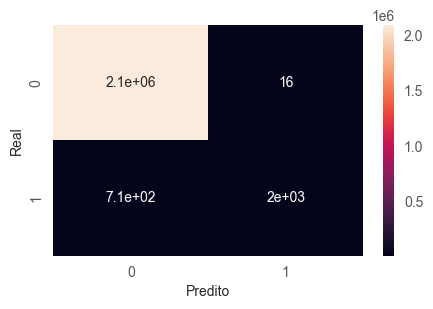

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.99      0.74      0.85      2710

    accuracy                           1.00   2099665
   macro avg       1.00      0.87      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [91]:
print("="*54)
print(f'Metricas para Random Forest RandomSearchCV')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_rnd_rs, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_rnd_rs).round(3))
print("Precision:", precision_score(y_test, y_pred_rnd_rs).round(3))
print("Recall:", recall_score(y_test, y_pred_rnd_rs).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_rnd_rs, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_rnd_rs))
print('-'*54)

# 8.Análise dos resultados e Conclusão

## Performance e seleção do melhor modelo

In [ ]:
resultado_modelos

,Acurácia,Precision,Recall,F1 score,Execução (s),Processamento/transação (s)
Random Forest,1.00,0.96,0.79,0.87,36.88,0.000227
Árvore Decisão,1.00,0.97,0.75,0.84,48.19,0.000820
XGBoost,1.00,1.00,0.69,0.82,289.08,0.000538
Regresão Logistica,1.00,0.92,0.41,0.57,41.39,0.000140


Devido o fato de os dados estarem desbalanceados se torna dificil obter modelos extremamentes performaticos, porém algum aumento a mais de eficiencia em identificar fraudes de maneira adequada já representa a economia de uma grande quantia de dinheiro e investimentos.<br>
<br>
O modelo de regressão linear foi o menos eficiente, já que se trata de um modelo mais simples e de facil interpretação, mas já é um modelo que poderia trazer algum benefício se utilizado.<br>
<br>
Nosso melhor modelo foi o RandomForest, e a árvore de decisão não demonstrou performance muito abaixo.<br>
<br>
O XGBoost por ser um modelo mais complexo demandou maior tempo de execução e não obteve resultados melhores do que a árvore de decisão. Isso pode ser devido a escolha dos hiperparametros, e seria mais adequado investigar outras opções de otimização. Porém as técnicas de Random ou GridSearch para modelos mais complexos podem ser computacionalmente caras.<br>
<br>
Portanto nesse caso se quisermos um modelo mais rápido e mais simples poderemos implementar a **ÁRVORE DE DECISÃO** ou também **RANDOM FOREST**, sendo necessário consultar o cliente para sanar suas necessidades.<br>
Podemos também implementar algumas etapas adicionais como critérios de threshold e transações que poderiam ser classificadas como altamente suspeitas sendo interrompidas imediatamente ou aquelas que tem probabilidade menos de ser fraudes, acionando uma verificação ou contato com cliente para autorização da transação.

# 9.Referencias

## Data-Leakage

- https://machinelearningmastery.com/data-preparation-without-data-leakage/

- https://towardsdatascience.com/data-leakage-in-machine-learning-6161c167e8ba

- https://towardsdatascience.com/preventing-data-leakage-in-your-machine-learning-model-9ae54b3cd1fb



## Feature Importance/Selection

- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

- https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

- https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/

- https://neptune.ai/blog/feature-selection-methods

- https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

- https://gist.github.com/gvyshnya/abe6c06767922f8762bd288c2d897ce5

- https://gist.github.com/gvyshnya/513080f611491b8baa08cc1bf6987144

- https://gist.github.com/gvyshnya/abe6c06767922f8762bd288c2d897ce5

- https://gist.github.com/gvyshnya/de775c04f7f752eb66c1d40ed40bcb05

- https://gist.github.com/gvyshnya/7349198e74b4c5fc6caad18ac150ff07